In [1]:
%load_ext zipline

buy 1208.122 1170.564 Equity(1245 [GOOGL])
buy 526.74 524.69 Equity(8 [AAPL])
sell 531.26 531.4 Equity(8 [AAPL])
buy 532.87 528.7 Equity(8 [AAPL])
sell 539.78 544.99 Equity(8 [AAPL])


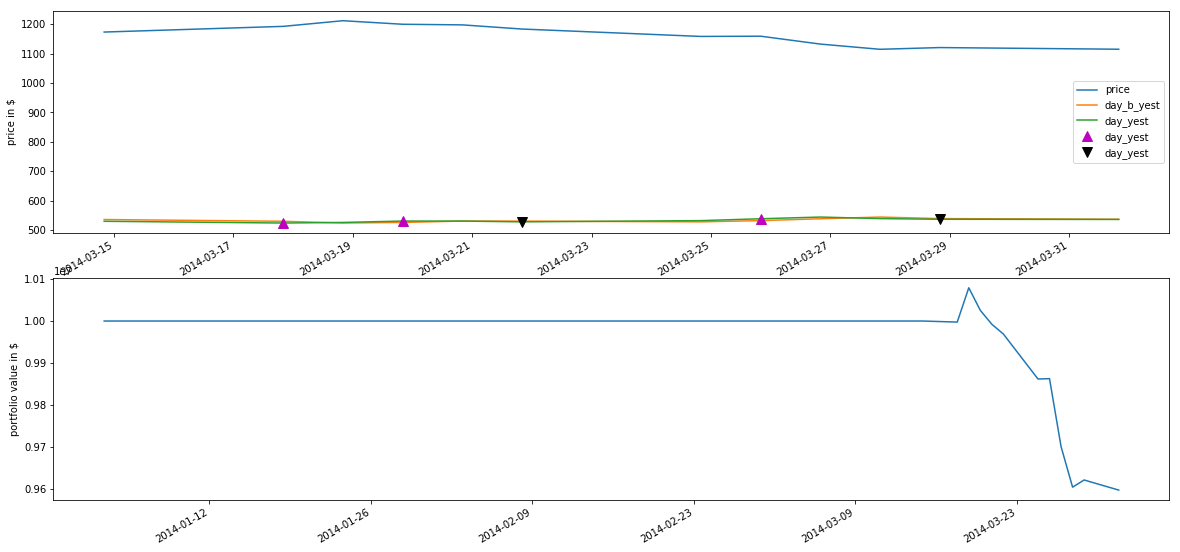

,algo_volatility,algorithm_period_return,alpha,asset,benchmark_period_return,benchmark_volatility,beta,capital_used,day_b_yest,day_yest,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2014-01-02 21:00:00+00:00,NaN,0.000000,NaN,NaN,0.000054,NaN,NaN,0.000000e+00,NaN,NaN,...,NaN,0.0,0,NaN,1.000000e+07,0.00,0.00,1,[],0.0
2014-01-03 21:00:00+00:00,0.000000,0.000000,NaN,NaN,0.000109,0.000000,NaN,0.000000e+00,NaN,NaN,...,NaN,0.0,0,NaN,1.000000e+07,0.00,0.00,2,[],0.0
2014-01-06 21:00:00+00:00,0.000000,0.000000,NaN,NaN,0.000163,0.000000,NaN,0.000000e+00,NaN,NaN,...,NaN,0.0,0,NaN,1.000000e+07,0.00,0.00,3,[],0.0
2014-01-07 21:00:00+00:00,0.000000,0.000000,NaN,NaN,0.000217,0.000000,NaN,0.000000e+00,NaN,NaN,...,NaN,0.0,0,NaN,1.000000e+07,0.00,0.00,4,[],0.0
2014-01-08 21:00:00+00:00,0.000000,0.000000,NaN,NaN,0.000272,0.000000,NaN,0.000000e+00,NaN,NaN,...,NaN,0.0,0,NaN,1.000000e+07,0.00,0.00,5,[],0.0
2014-01-09 21:00:00+00:00,0.000000,0.000000,NaN,NaN,0.000326,0.000000,NaN,0.000000e+00,NaN,NaN,...,NaN,0.0,0,NaN,1.000000e+07,0.00,0.00,6,[],0.0
2014-01-10 21:00:00+00:00,0.000000,0.000000,NaN,NaN,0.000381,0.000000,NaN,0.000000e+00,NaN,NaN,...,NaN,0.0,0,NaN,1.000000e+07,0.00,0.00,7,[],0.0
2014-01-13 21:00:00+00:00,0.000000,0.000000,NaN,NaN,0.000435,0.000000,NaN,0.000000e+00,NaN,NaN,...,NaN,0.0,0,NaN,1.000000e+07,0.00,0.00,8,[],0.0
2014-01-14 21:00:00+00:00,0.000000,0.000000,NaN,NaN,0.000489,0.000000,NaN,0.000000e+00,NaN,NaN,...,NaN,0.0,0,NaN,1.000000e+07,0.00,0.00,9,[],0.0
2014-01-15 21:00:00+00:00,0.000000,0.000000,NaN,NaN,0.000544,0.000000,NaN,0.000000e+00,NaN,NaN,...,NaN,0.0,0,NaN,1.000000e+07,0.00,0.00,10,[],0.0


In [16]:
%%zipline --start 2014-1-1 --end 2014-3-31  -o dma.pickle


from zipline.api import order,order_target,order_percent,order_value,order_target_value,order_target_percent, record, symbol

import matplotlib.pyplot as plt

def rebalance(context, data):
    pl1 = 0
    pl2 = 0
    
    if sell_price1 > 0:
        pl1 = (context.sell_price1 - context.buy_price1) * context.qty1
    else:
        pl1 = (data.current(context.asset1, 'price') - context.buy_price1) * context.qty1
        
    if sell_price2 > 0:
        pl2 = (context.sell_price2 - context.buy_price2) * context.qty2
    else:
        pl2 = (data.current(context.asset2, 'price') - context.buy_price2) * context.qty2
        
    if pl1 > pl2:
        context.trade1_amt = 0.75 * context.portfolio.portfolio_value
        context.trade2_amt = 0.25 * context.portfolio.portfolio_value
    else:
        context.trade2_amt = 0.75 * context.portfolio.portfolio_value
        context.trade1_amt = 0.25 * context.portfolio.portfolio_value

def initialize(context):
    context.i = 0
    context.day_b_yest = 0
    context.day_yest = 0
    context.trade1_amt = 0.5 * context.portfolio.portfolio_value
    context.trade2_amt = 0.5 * context.portfolio.portfolio_value
    context.asset1 = symbol('AAPL')
    context.asset2 = symbol('GOOGL')
    context.buy_price1 = 0
    context.buy_price2 = 0
    context.sell_price1 = 0
    context.sell_price2 = 0
    context.qty1 = 0
    context.qty2 = 0

    #context.portfolio.starting_cash = 10000
    schedule_function(rebalance, date_rules.every_week())

    


def handle_data(context, data):
    context.i += 1
    if context.i == 48:
        context.day_b_yest = data.history(context.asset1, 'price', bar_count=1, frequency="1d")[0]
    elif context.i == 49:
        context.day_yest = data.history(context.asset1, 'price', bar_count=1, frequency="1d")[0]
    elif context.i > 49:    
        if context.day_yest > context.day_b_yest and context.qty1 == 0:
            price = data.current(context.asset1, 'price')
            qty = context.trade1_amt / price
            order_target(context.asset1,  qty)
            context.buy_price1 = price
            context.qty1 = qty
            #print('buy ' + str(context.day_yest) + ' ' + str(context.day_b_yest) + ' ' + str(context.asset1))
        elif context.day_yest <= context.day_b_yest and context.qty1 > 0:
            price = data.current(context.asset1, 'price')
            order_target(context.asset1, 0)
            context.sell_price1 = price
            #print('sell ' + str(context.day_yest) + ' ' + str(context.day_b_yest) + ' ' + str(context.asset1))


        # Save values for later inspection
        record(price=data.current(context.asset1, 'price'),
               asset=context.asset1,
               day_yest=context.day_yest,
               day_b_yest=context.day_b_yest)
        context.day_b_yest = context.day_yest
        context.day_yest = data.history(context.asset1, 'price', bar_count=1, frequency="1d")[0]
        
        
        short_mavg = data.history(context.asset2, 'price', bar_count=20, frequency="1d").mean()
        long_mavg = data.history(context.asset2, 'price', bar_count=50, frequency="1d").mean()

        if short_mavg > long_mavg and context.trade2_status == 0:
            price = data.current(context.asset2, 'price')
            qty = context.trade2_amt / price
            
            order_target(context.asset2,  qty)
            context.buy_price2 = price
            context.qty2 = qty
            #print('buy ' + str(short_mavg) + ' ' + str(long_mavg) + ' ' + str(context.asset2))
        elif short_mavg < long_mavg and context.trade2_status == 1:
            price = data.current(context.asset2, 'price')
            order_target(context.asset2, 0)
            context.sell_price2 = price
            
            #print('sell ' + str(short_mavg) + ' ' + str(long_mavg) + ' ' +  str(context.asset2))
        record(price=data.current(context.asset2, 'price'),
               asset=context.asset2,
               short_mavg=short_mavg,
               long_mavg=long_mavg)

def analyze(context, perf):
    perf.to_csv('out.csv')
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(212)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    ax2 = fig.add_subplot(211)
    perf['price'].plot(ax=ax2)
    perf[['day_b_yest','day_yest']].plot(ax=ax2)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.day_yest.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.day_yest.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show()

